## Introduction To ML

## 1.In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course. 


What is ML?

    Machine Learning which allows a machine to automatically learn from past data without programming explicitly. It is self learning from data and applies the learning without human intervention and predict the outputs.
    
When to use ML?

    We can't use ML for all situations. We need some valid reasons to use Machine Learning. For instance,

        * If we need to know the reason for churn (draw casual insights)

        * If we can see patterns from the data

        * If we have enough data to analyze. Having enough data is key to successful machine learning projects.

        * If we want to predict future events
  
When not to use ML?

        * If we don't see any patterns in the data then we won't be able to do machine learning.

        * When we don't have enough data or too messy data. 

        It is summarized in saying "Garbage in, garbage out", that means if we give incorrect or poor quality data as an input, the output will be of the same low quality. Always make sure that about data before pursuing machine learning.

        * We should understand what we are predicting. For example, Is it fraud, is it churn, is it customer purchase, production failure, car crash? Can we observe the target variable, do we have a clear definition of it, or do we have to invent it? We have to find answers for these questions before we start use ML. 

        * If we have poor performance in our ML models like our predictions are not accurate enough (low precision), if we get large error, our model might captured only 25% of fraudulent transactions (low recall)., so we missed 75% of fraudulent transactions. 
    
        * Poor target variable definition

        * Delaying market testing to push incremental improvements to the model.

## 2. Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques. 


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from codetiming import Timer
import time

In [5]:
#loading dataset and convert into df
lend_club_df=pd.read_csv('loans_full_schema.csv')
lend_club_df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


### Preprocessing

Preprocessing is an initial step when we use Machine Learning. After loading our dataset, we have to prepare(**cleaning and organizing**) our data to make it suitable for Machine learning models. Some Preprocessing steps are:

* Cleaning null values,handling missing datas, removing weird symbols..
* Standardizing our dataset, Scaling the columns
* Converting categorical value columns into numerical values.

#### 1. Handling missing Values

In [6]:
lend_club_df.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [7]:
# isnull().sum() clearly shows us how many columns are having null values. Some of the columns('annual_income_joint',
# 'verification_income_joint','debt_to_income_joint','months_since_last_delinq','months_since_90d_late') has more null values.
# So I am dropping those columns.

In [30]:
lend_df= lend_club_df.drop(['annual_income_joint','verification_income_joint','debt_to_income_joint','months_since_last_delinq','months_since_90d_late'],axis=1)
lend_df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,2001,6,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,1996,1,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,2006,4,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,2007,0,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,2008,7,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,0,2008,5,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,4,1994,1,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,2,2004,0,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,0,1999,1,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [31]:
#remaining four columns have less number of Nans. So I can fill it using fillna()
lend_df= lend_df.fillna(value='Mean')
lend_df.notnull().sum()

emp_title                           10000
emp_length                          10000
state                               10000
homeownership                       10000
annual_income                       10000
verified_income                     10000
debt_to_income                      10000
delinq_2y                           10000
earliest_credit_line                10000
inquiries_last_12m                  10000
total_credit_lines                  10000
open_credit_lines                   10000
total_credit_limit                  10000
total_credit_utilized               10000
num_collections_last_12m            10000
num_historical_failed_to_pay        10000
current_accounts_delinq             10000
total_collection_amount_ever        10000
current_installment_accounts        10000
accounts_opened_24m                 10000
months_since_last_credit_inquiry    10000
num_satisfactory_accounts           10000
num_accounts_120d_past_due          10000
num_accounts_30d_past_due         

In [ ]:
#we have replaced all Nans with mean values. Finally we don't have any Nans in our dataframe.

#### 2.Standardization

We can standardize our columns by using log transformation

* When can we standardize?
    **If any of our columns has high variance, then we have to standardize it**

In [10]:
# finding variance for lend_df columns
lend_df.var()

C:\Users\Codergirl\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


annual_income                   4.190528e+09
delinq_2y                       4.673907e-01
earliest_credit_line            6.076998e+01
inquiries_last_12m              5.665019e+00
total_credit_lines              1.412637e+02
open_credit_lines               3.443670e+01
total_credit_limit              3.520603e+10
total_credit_utilized           2.876899e+09
num_collections_last_12m        1.601116e-02
num_historical_failed_to_pay    4.730249e-01
current_accounts_delinq         1.000000e-04
total_collection_amount_ever    4.868156e+06
current_installment_accounts    8.616497e+00
accounts_opened_24m             9.976646e+00
num_satisfactory_accounts       3.433614e+01
num_accounts_30d_past_due       1.000000e-04
num_active_debit_accounts       5.927711e+00
total_debit_limit               7.059736e+08
num_total_cc_accounts           6.201110e+01
num_open_cc_accounts            2.407478e+01
num_cc_carrying_balance         1.107308e+01
num_mort_accounts               2.949029e+00
account_ne

In [11]:
# ooohhh, it seems like more canditate columns for standardization. So using function we can take log to the columns 
# which has high variance. Created a function to check the variance of all columns and take log transformation for 
# the high variance columns. 

def log(df):
    for i in df:
        try:
            if df[i].var()>10:
                df['new'+i]=np.log(df[i]) 
                if np.isnan(df['new'+i].var()):
                    df['new'+i].replace(np.inf, 0,inplace=True)
                    df['new'+i].replace(-np.inf, 0,inplace=True)
                    df['new'+i].replace(np.nan,0)
            
        except TypeError:
            print("could not convert string to float")
        except Exception as e:
            print(e)
            
# handled the error for non numeric columns

# creating a copy of lend_df so that any changes made to a copy df do not reflect in the original df. 
lend_copy_df=lend_df.copy(deep=False)   
log(lend_copy_df)


could not convert string to float
could not convert string to float
could not convert string to float
could not convert string to float
could not convert string to float
could not convert string to float
could not convert string to float
could not convert string to float
could not convert string to float
could not convert string to float
could not convert string to float
could not convert string to float
could not convert string to float
could not convert string to float
could not convert string to float
could not convert string to float


C:\Users\Codergirl\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
lend_copy_df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,...,newnum_cc_carrying_balance,newaccount_never_delinq_percent,newloan_amount,newterm,newinterest_rate,newinstallment,newbalance,newpaid_total,newpaid_principal,newpaid_interest
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,2001,6,...,1.791759,4.531524,10.239960,4.094345,2.644045,6.480857,10.204179,7.600567,6.891768,6.922831
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,1996,1,...,1.386294,4.605170,8.517193,3.583519,2.534490,5.121222,8.444917,6.212847,5.854011,5.013897
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,2006,4,...,1.791759,4.537961,7.600902,3.583519,2.838493,4.268298,7.509133,5.641198,5.166898,4.667487
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,2007,0,...,0.693147,4.605170,9.980449,3.583519,1.905088,6.498568,9.844441,8.105576,7.918170,6.338859
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,2008,7,...,2.564949,4.605170,10.043249,3.583519,2.644045,6.668063,9.972554,7.751325,7.358735,6.626453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,0,2008,5,...,1.386294,4.605170,10.085809,3.583519,1.994700,6.613250,9.979816,7.996250,7.788900,6.321020
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,4,1994,1,...,2.079442,4.407938,9.210340,3.583519,2.946017,5.904599,9.121229,7.283661,6.748244,6.403160
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,2,2004,0,...,1.609438,4.279440,10.308953,3.583519,3.173041,7.069109,10.226210,8.438323,7.775843,7.713539
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,0,1999,1,...,0.693147,4.605170,10.085809,3.583519,1.671473,6.583077,9.976651,7.963220,7.816772,5.969807


In [13]:
#Now we have reduced high variance into low variance using log transformations. We can check our new variance
lend_copy_df.var()

C:\Users\Codergirl\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


annual_income                      4.190528e+09
delinq_2y                          4.673907e-01
earliest_credit_line               6.076998e+01
inquiries_last_12m                 5.665019e+00
total_credit_lines                 1.412637e+02
open_credit_lines                  3.443670e+01
total_credit_limit                 3.520603e+10
total_credit_utilized              2.876899e+09
num_collections_last_12m           1.601116e-02
num_historical_failed_to_pay       4.730249e-01
current_accounts_delinq            1.000000e-04
total_collection_amount_ever       4.868156e+06
current_installment_accounts       8.616497e+00
accounts_opened_24m                9.976646e+00
num_satisfactory_accounts          3.433614e+01
num_accounts_30d_past_due          1.000000e-04
num_active_debit_accounts          5.927711e+00
total_debit_limit                  7.059736e+08
num_total_cc_accounts              6.201110e+01
num_open_cc_accounts               2.407478e+01
num_cc_carrying_balance            1.107

In [14]:
#all the new standardized columns now have less variance.
#After we standardized our numerical columns, now we can move to categorical columns

#### 3. Converting Categorical Values into Numeric Values( Encoding)


* Machine learning models require all input and output variables to be numeric.So we have to convert our categorical column into numerical column.


* We have many methods to do that. We can do it manually using lambda, we can use label encoder from scikit learn, we have one hot encoding method, we can use mapping,we can implement get dummies method also.

In [15]:
# converted initial_listing_status,disbursement_method columns into numeric columns using lambda
lend_copy_df['list_status_encode']=lend_copy_df['initial_listing_status'].apply(lambda x: 1 if x == 'whole' else 0)
lend_copy_df['encoded_disbursement_method']=lend_copy_df['disbursement_method'].apply(lambda x: 1 if x=='Cash' else 0)
lend_copy_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,...,newloan_amount,newterm,newinterest_rate,newinstallment,newbalance,newpaid_total,newpaid_principal,newpaid_interest,list_status_encode,encoded_disbursement_method
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,2001,6,...,10.239960,4.094345,2.644045,6.480857,10.204179,7.600567,6.891768,6.922831,1,1
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,1996,1,...,8.517193,3.583519,2.534490,5.121222,8.444917,6.212847,5.854011,5.013897,1,1
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,2006,4,...,7.600902,3.583519,2.838493,4.268298,7.509133,5.641198,5.166898,4.667487,0,1
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,2007,0,...,9.980449,3.583519,1.905088,6.498568,9.844441,8.105576,7.918170,6.338859,1,1
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,2008,7,...,10.043249,3.583519,2.644045,6.668063,9.972554,7.751325,7.358735,6.626453,1,1


In [16]:
# converted verified_income column into numeric column using one hot encode method

# mapping helps to assign index values for our inputs. We can use np.zeros() function to create an array with zeros and 
# assigning 1 to the index values.

mapping = {}
for i in range(len(lend_copy_df['verified_income'].unique())):
    mapping[lend_copy_df['verified_income'].unique()[i]] = i
    #print(mapping)
       
one_hot_code=[]
for i in lend_copy_df['verified_income']:
    array= list(np.zeros(len(lend_copy_df['verified_income'].unique()),dtype=int))
    array[mapping[i]]=1
    one_hot_code.append(array)
    
lend_copy_df['encode_income']=one_hot_code
lend_copy_df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,...,newterm,newinterest_rate,newinstallment,newbalance,newpaid_total,newpaid_principal,newpaid_interest,list_status_encode,encoded_disbursement_method,encode_income
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,2001,6,...,4.094345,2.644045,6.480857,10.204179,7.600567,6.891768,6.922831,1,1,"[1, 0, 0]"
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,1996,1,...,3.583519,2.534490,5.121222,8.444917,6.212847,5.854011,5.013897,1,1,"[0, 1, 0]"
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,2006,4,...,3.583519,2.838493,4.268298,7.509133,5.641198,5.166898,4.667487,0,1,"[0, 0, 1]"
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,2007,0,...,3.583519,1.905088,6.498568,9.844441,8.105576,7.918170,6.338859,1,1,"[0, 1, 0]"
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,2008,7,...,3.583519,2.644045,6.668063,9.972554,7.751325,7.358735,6.626453,1,1,"[1, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,0,2008,5,...,3.583519,1.994700,6.613250,9.979816,7.996250,7.788900,6.321020,1,1,"[0, 0, 1]"
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,4,1994,1,...,3.583519,2.946017,5.904599,9.121229,7.283661,6.748244,6.403160,1,1,"[1, 0, 0]"
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,2,2004,0,...,3.583519,3.173041,7.069109,10.226210,8.438323,7.775843,7.713539,0,1,"[1, 0, 0]"
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,0,1999,1,...,3.583519,1.671473,6.583077,9.976651,7.963220,7.816772,5.969807,1,1,"[0, 0, 1]"


#### Summary of preprocessing


* Dropped the columns which has very high number of Nans and filled Nans in other columns with its mean.(Handling missing values)


* Standardized High variance columns using log transformation and reduced the variance.(Standardization)


* Converted few categorical columns into numeric columns. (Encoding)

## 3. Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.


In [17]:
# I have extracted numeric only columns from the dataframe
numer_cols_df=lend_df.select_dtypes(include=[np.number])
numer_cols_df

,annual_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,90000.0,0,2001,6,28,10,70795,38767,0,0,...,0,28000,60,14.07,652.53,27015.86,1999.33,984.14,1015.19,0.0
1,40000.0,0,1996,1,30,14,28800,4321,0,1,...,1,5000,36,12.61,167.54,4651.37,499.12,348.63,150.49,0.0
2,40000.0,0,2006,4,31,10,24193,16000,0,0,...,0,2000,36,17.09,71.40,1824.63,281.80,175.37,106.43,0.0
3,30000.0,0,2007,0,4,4,25400,4997,0,1,...,0,21600,36,6.72,664.19,18853.26,3312.89,2746.74,566.15,0.0
4,35000.0,0,2008,7,22,16,69839,52722,0,0,...,0,23000,36,14.07,786.87,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,108000.0,0,2008,5,44,13,199195,77963,0,1,...,1,24000,36,7.35,744.90,21586.34,2969.80,2413.66,556.14,0.0
9996,121000.0,4,1994,1,28,15,382061,101571,0,0,...,0,10000,36,19.03,366.72,9147.44,1456.31,852.56,603.75,0.0
9997,67000.0,2,2004,0,18,11,346402,95421,0,0,...,0,30000,36,23.88,1175.10,27617.65,4620.80,2382.35,2238.45,0.0
9998,80000.0,0,1999,1,38,15,294475,27641,0,0,...,0,24000,36,5.32,722.76,21518.12,2873.31,2481.88,391.43,0.0


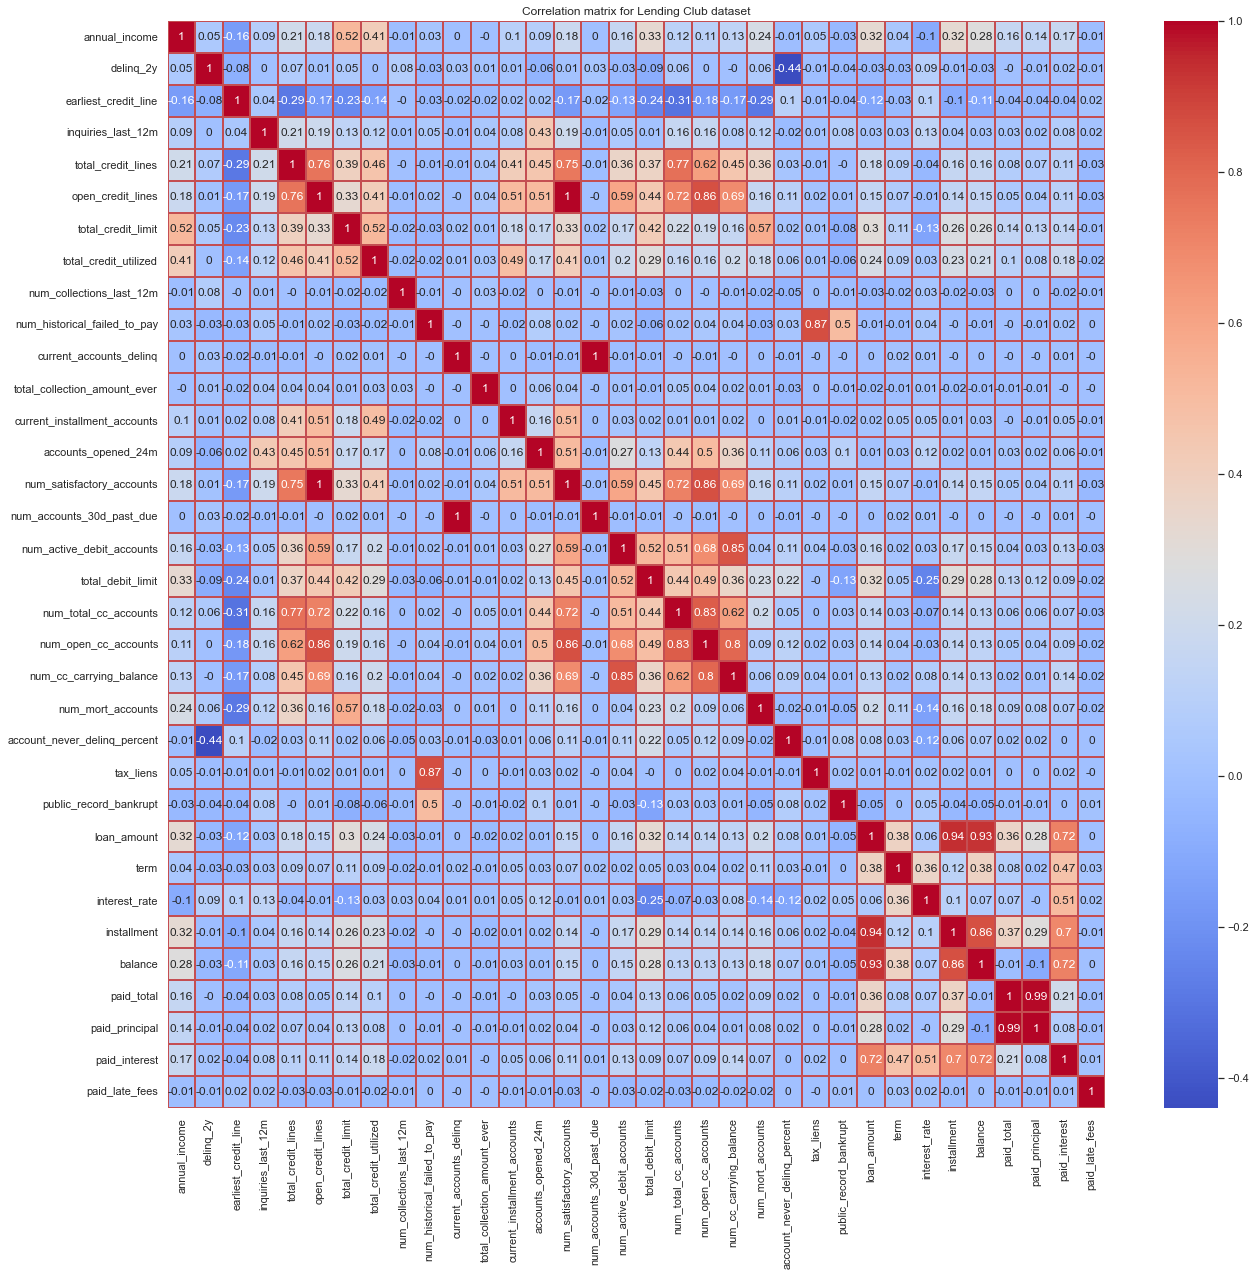

In [32]:
fig,ax=plt.subplots()
sns.set(rc={"figure.figsize":(21, 20)})
sns.heatmap(numer_cols_df.corr().round(2),annot= True,cmap="coolwarm",linewidth=1.5,linecolor='r')
ax.set_title('Correlation matrix for Lending Club dataset');
plt.show()

#### Observations from heat map: 

* Why HeatMaps?

        *  It is an effective way to compare datas using size and colors.
        *  We are able to identify patterns or correlation much quicker than looking at the raw data of the table.

* Correlation heatmap is a graphical representation of correlation matrix representing correlation between different columns. Each cell in the table shows the correlation between two variables. 


* Method corr() is used on the numer_cols_df DataFrame to determine correlation between the columns. Setting annotations True, will print the correlation values inside graph.


* The correlation goes from + 1 to - 1 where 1 is total positive linear correlation 0 is no linear correlation and negative 1 is total negative linear correlation.


* From color bar, 
        
        * Blues are negative correlations, 
        
        * Darker the blue, stronger negative correlation 
        
        * middle section where the colors are real light white or almost gray where there's not much correlation at all 
        
        * the Reds are positive correlation and 
        
        * the darker the red the stronger positive correlation
        

* We can observe from the graph that all diagnols have strong positive correlation.  So any of the columns with the same columns we get strong correlation.
        
 
 * For example, if we want to know correlation between num_historical_failed_to_pay and tax_liens columns from the heat map, its 0.87 its almost stronger correlation and thats why it is in darker in red.

## 4.Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes. 


There are total 10000 loan_amount in the lending data set. The distribution of loan_amount is

from 0 to <=1000 --> 42

from >1000 to 5000 --> 1297

from >5000 to 10000 --> 2484

from >10000 to 15000 --> 1781

from >15000 to 20000 --> 1574

from >20000 to 25000 --> 943

from >25000 to 30000 --> 759

from >30000 to 35000 --> 545

from >35000 to 40000 --> 575

So I have chosen my bins (0,5000,10000,15000,20000,25000,30000,35000,40000) to show how many are fallen under the respective bins.


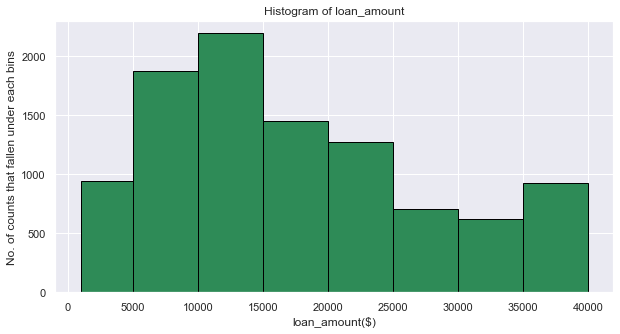

In [20]:
fig,ax=plt.subplots(figsize=(10,5))
ax.hist(lend_df['loan_amount'],bins=[1000,5000,10000,15000,20000,25000,30000,35000,40000],color ='seagreen',edgecolor='black')
ax.set_xlabel('loan_amount($)')
ax.set_title("Histogram of loan_amount")
ax.set_ylabel('No. of counts that fallen under each bins');

## 5.Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function. 

In [34]:
#creating new column called region using lambda function

Plains=['KS','NE','MN','WI','IL','IN']
Pacific=['WA','OR','CA','AK','HI','MO']
Midwest=['MN','IA','IN','MI','OH','ND','SD']
Northeast=['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']
South=['AZ','TX','NM','OK','GA','NC','VA','FL','KY','SC','LA','AL','WV','DC','AR','DE','MS','TN']
t = Timer(name="class")
t.start()                                            
lend_df['region'] =list(map(lambda x: 'Plains' if x in Plains else ('Pacific' if x in Pacific else ('Northeast' if x in Northeast else ('Midwest' if x in Midwest else 'South'))),lend_df['state']))
t.stop()

lend_df


Elapsed time: 0.0089 seconds


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,region
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,2001,6,...,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,Northeast
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,1996,1,...,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,Pacific
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,2006,4,...,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,Plains
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,2007,0,...,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,Northeast
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,2008,7,...,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,0,2008,5,...,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0,South
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,4,1994,1,...,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0,Northeast
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,2,2004,0,...,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0,Northeast
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,0,1999,1,...,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0,Plains


### Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown. 

In [22]:
#creating new column called region using function
Plains=['KS','NE','WI','IL','IN']
Pacific=['WA','OR','CA','AK','HI']
Midwest=['MN','IA','IN','MI','OH','MO','ND','SD']
Northeast=['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']
South=['AZ','TX','NM','OK','GA','NC','VA','FL','KY','SC','LA','AL','WV','DC','AR','DE','MS','TN']

t.start()     

def regions(state):
    if state in Plains:
        return 'Plains'
    elif state in Pacific:
        return 'Pacific'
    elif state in South:
        return 'South'
    elif state in Midwest:
        return 'Midwest'
    elif state in Northeast:
        return 'NorthEast'

lend_df['Region1']=lend_df['state'].apply(regions)
t.stop()


Elapsed time: 0.0094 seconds


0.009384699999998247

### Is there a better way to do this than with a lambda? 

* I have created region column using lambda and another approach using function. 

* Lambda function approach seems to be better than function. I have used timer to check how much time both of my methods taking. 

* For this question, lambda is the better way. Because it is simple and straightforward function. 

* saves time and works efficiently.


## 6.Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

In [35]:
pacific = lend_df[lend_df['region']=='Pacific']['loan_amount']
pacific_df=pd.DataFrame(pacific)
pacific_df

,loan_amount
1,5000
4,23000
19,20000
29,6000
30,12000
...,...
9964,7500
9971,8000
9972,8975
9982,16000


In [36]:
plains = lend_df[lend_df['region']=='Plains']['loan_amount']
plains_df=pd.DataFrame(plains)
plains_df

,loan_amount
2,2000
9,6400
10,25000
18,5000
27,3200
...,...
9925,25000
9949,4300
9957,6000
9966,1975


In [37]:
South = lend_df[lend_df['region']=='South']['loan_amount']
south_df=pd.DataFrame(South)
south_df

,loan_amount
5,5000
7,20000
8,20000
11,40000
12,16000
...,...
9981,30000
9987,16000
9989,10000
9993,5000


In [38]:
Midwest = lend_df[lend_df['region']=='Midwest']['loan_amount']
Midwest_df=pd.DataFrame(Midwest)
Midwest_df

,loan_amount
6,24000
40,10000
77,2400
85,5000
127,20000
...,...
9968,30500
9976,14000
9979,30000
9983,20000


In [55]:
NorthEast = lend_df[lend_df['region']=='Northeast']['loan_amount']
NorthEast_df=pd.DataFrame(NorthEast)
NorthEast_df

,loan_amount
0,28000
3,21600
22,21050
25,18000
26,10000
...,...
9991,35000
9992,23000
9996,10000
9997,30000


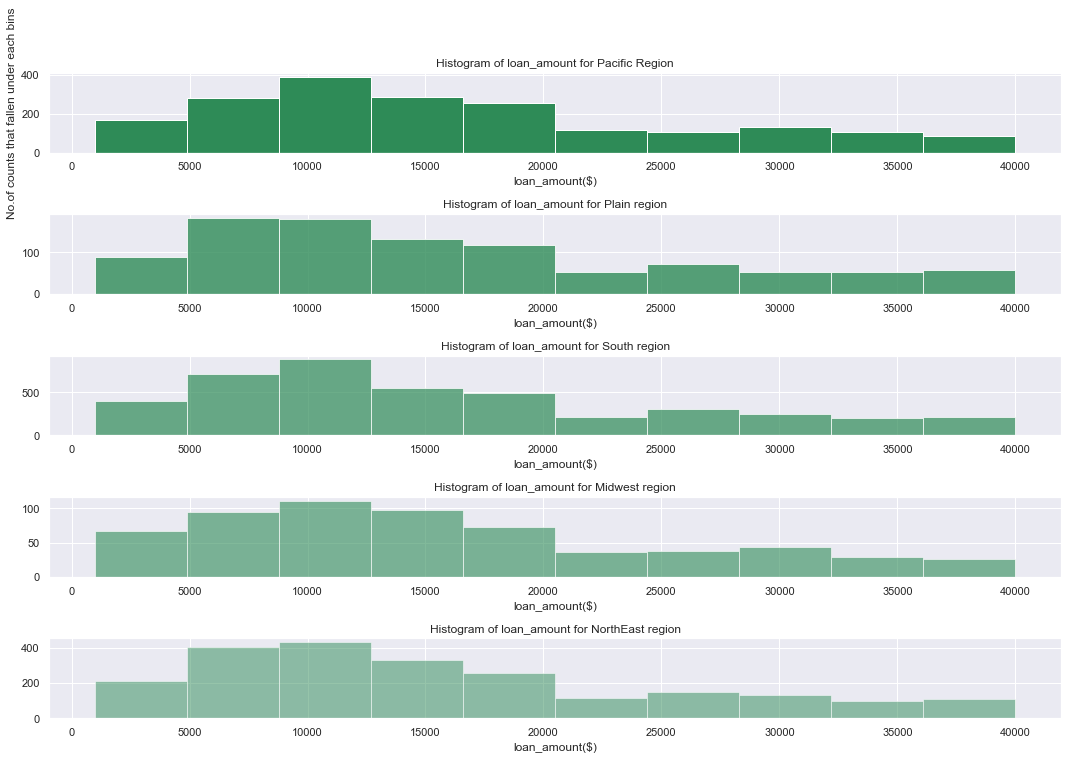

In [53]:
fig,ax=plt.subplots(5,1)
plt.rcParams['figure.figsize'] = [15, 10]
ax[0].hist(pacific_df['loan_amount'],color = 'seagreen')
ax[0].set_xlabel('loan_amount($)')
ax[0].set_title("Histogram of loan_amount for Pacific Region")
ax[0].set_ylabel('No.of counts that fallen under each bins')
ax[1].hist(plains_df['loan_amount'],color = 'seagreen',alpha=0.8)
ax[1].set_xlabel('loan_amount($)')
ax[1].set_title("Histogram of loan_amount for Plain region")
ax[2].hist(south_df['loan_amount'],color = 'seagreen',alpha=0.7)
ax[2].set_xlabel('loan_amount($)')
ax[2].set_title("Histogram of loan_amount for South region")
ax[3].hist(Midwest_df['loan_amount'],color = 'seagreen',alpha=0.6)
ax[3].set_xlabel('loan_amount($)')
ax[3].set_title("Histogram of loan_amount for Midwest region")
ax[4].hist(NorthEast_df['loan_amount'],color = 'seagreen',alpha=0.5)
ax[4].set_xlabel('loan_amount($)')
ax[4].set_title("Histogram of loan_amount for NorthEast region")
plt.tight_layout()
plt.show()

In [ ]:
# From the histogram subplots,distribution of loan_amount for different regions are almost same. Only the number of 
# counts that falls under each bins varies. 

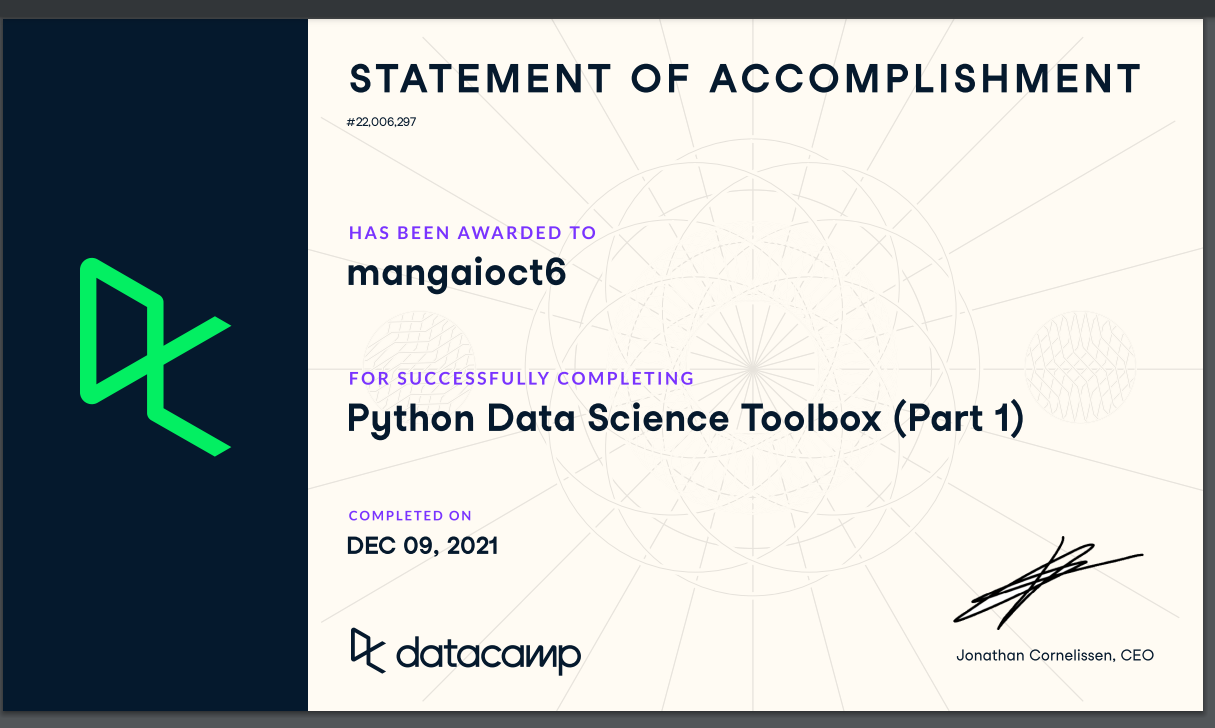

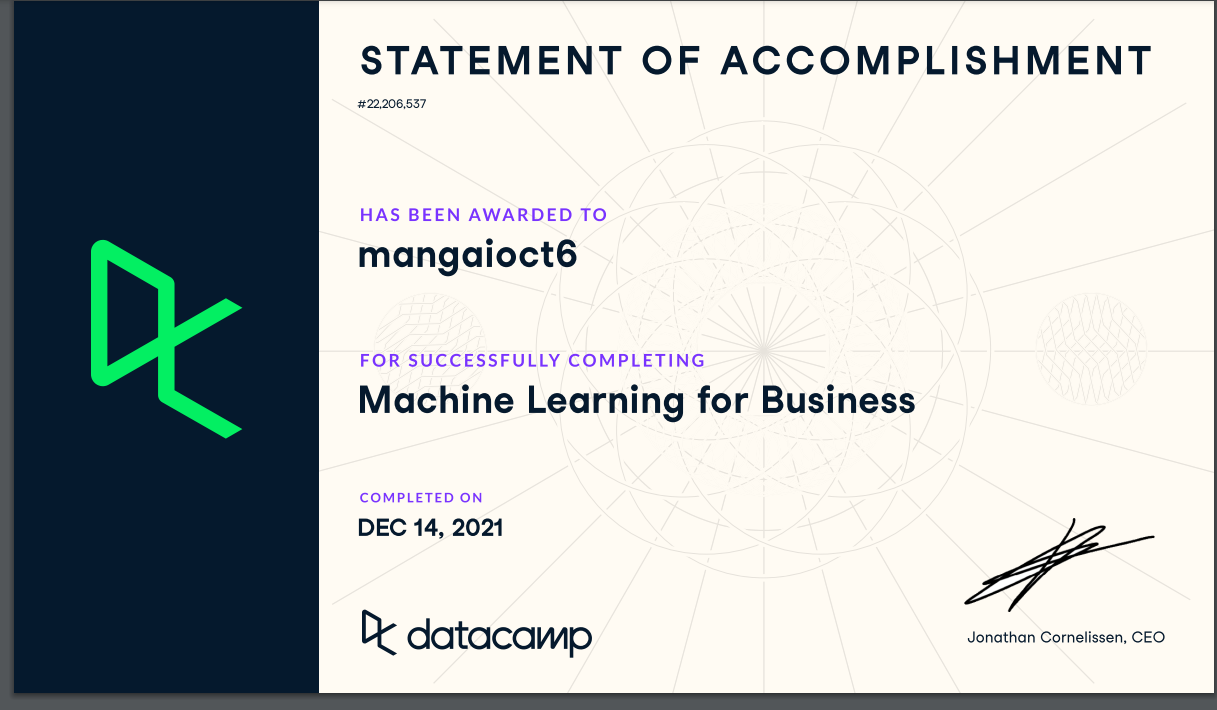